In [10]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def show(img):
    plt.figure(figsize = (10,10))
    plt.imshow(img,cmap= 'gray')
    plt.show()
    

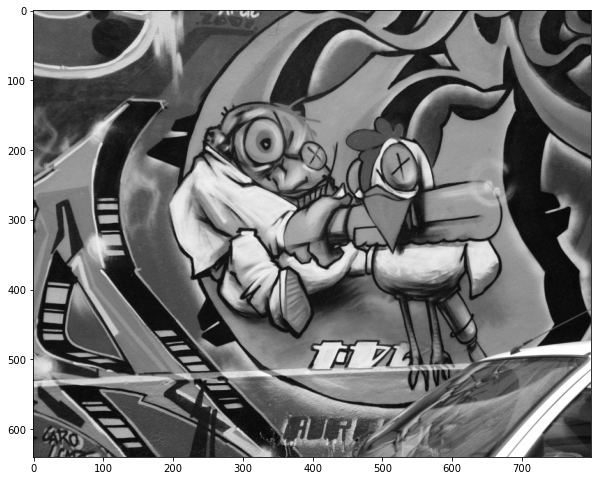

In [12]:
img = cv2.imread('/home/sumin/Documents/robot_vision/SIFT/img1.ppm',cv2.IMREAD_GRAYSCALE)
show(img)



In [14]:
def gaussian_kernel(img , kernel_size, sigma):
    size = kernel_size//2
    y, x = np.ogrid[-size:size+1, -size:size+1] 
    filter = 1/(2*np.pi * (sigma**2)) * np.exp(-1 *(x**2 + y**2) /(2*(sigma**2))) 
    sum = filter.sum() 
    filter /= sum 
    return filter



In [15]:
def padding(img, k_size):
    pad_size = k_size//2
    rows, cols, ch = img.shape
    res = np.zeros((rows + (2*pad_size), cols+(2*pad_size), ch), dtype=np.float) 
    if pad_size == 0: 
        res = img.copy() 
    else: 
        res[pad_size:-pad_size, pad_size:-pad_size] = img.copy() 
    return res




In [16]:
def gaussian_filtering(img, k_size=3,sigma=1): 
    rows, cols, channels = img.shape 
    filter = gaussian_kernel(k_size, sigma)
    pad_img = padding(img,k_size) 
    filtered_img = np.zeros((rows, cols, channels), dtype=np.float32) 
    for ch in range(0, channels): 
        for i in range(rows): 
            for j in range(cols): filtered_img[i, j, ch] = np.sum(filter * pad_img[i:i+k_size, j:j+k_size, ch]) 
            return filtered_img.astype(np.uint8)
